In [2]:
import numpy as np
import pygrib
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import pandas as pd
from scipy.constants import convert_temperature
import pytz
from datetime import datetime
from metpy import calc
from metpy.units import units
import matplotlib as mpl
from meteocalc import dew_point
mpl.rc("savefig", dpi=300)

In [134]:
df = pd.read_csv('./extracted/East_lansing/temp_2001-2018_9km.csv')
Temp = convert_temperature(df.Temp, 'Kelvin', 'Fahrenheit')
temp = convert_temperature(df.Temp, 'Kelvin', 'Celsius')
df = pd.read_csv('./extracted/East_lansing/dew_2001-2018_9km.csv')
dew = convert_temperature(df.Dewpoint, 'Kelvin', 'Celsius')
Dew = convert_temperature(df.Dewpoint, 'Kelvin', 'Fahrenheit')
df = pd.read_csv('./extracted/East_lansing/U_2001-2018_9km.csv')
u = df.U * 2.23694
df = pd.read_csv('./extracted/East_lansing/V_2001-2018_9km.csv')
v = df.V * 2.23694  
df = pd.read_csv('./extracted/East_lansing/prcp_2001-2018_9km.csv')
prcp0 = df.Prcp * 39.3701
df = pd.read_csv('./solar_2001-2018_9km.csv')
solar0 = df.Solar / 41840.0 

In [135]:
prcp = 1*prcp0
solar = 1*solar0
for i in range(6574-1):
    prcp[(i*24+1):((i+1)*24)] = np.array(prcp0[(i*24+1):((i+1)*24)]) - np.array(prcp0[(i*24):((i+1)*24-1)])
    solar[(i*24+1):((i+1)*24)] = np.array(solar0[(i*24+1):((i+1)*24)]) - np.array(solar0[(i*24):((i+1)*24-1)])
    
i = 6573
prcp[(i*24+1):((i+1)*24-1)] = np.array(prcp0[(i*24+1):((i+1)*24-1)]) - np.array(prcp0[(i*24):((i+1)*24-2)])
solar[(i*24+1):((i+1)*24-1)] = np.array(solar0[(i*24+1):((i+1)*24-1)]) - np.array(solar0[(i*24):((i+1)*24-2)])

In [136]:
rh = np.array([calc.relative_humidity_from_dewpoint(units.Quantity(temp, 'celsius'), units.Quantity(dew, 'celsius'))])[0,:]
wind = np.sqrt(u**2 + v**2)

In [137]:
eastern = pytz.timezone('US/Eastern')
dff = pd.date_range(start='1/1/2001', end='1/1/2019', freq='H')[1:-1].tz_localize(pytz.utc).tz_convert(eastern)
year = dff.strftime('%Y')
mon = dff.strftime('%-m')
day = dff.strftime('%-d')
hour = dff.strftime('%-H')

In [138]:
out = pd.DataFrame({'YEAR':year, 'MONTH':mon, 'DAY':day, 'HOUR':hour, 'atmp':Temp, 'pcpn':prcp, 'relh':rh*100, 'srad':solar, 'wspd':wind, 'dew':Dew})
out = out.drop(out.index[0:5])
out.to_csv('./extracted/East_lansing/East_Lansing.csv', index=False)

In [143]:
# df1 = pd.read_csv('./observation/East Lansing Hourly.csv')
# # df1 = pd.read_csv('./observation/East Lansing 5 min.csv')
# df1 = df1.drop(df1.index[157770:])
# df1 = df1.astype(float)
# df1.relh = np.where(df1.relh[:]<=100.0, df1.relh[:], 100.0)
# df1 = pd.DataFrame({'YEAR':df1.YEAR, 'MONTH':df1.MONTH, 'DAY':df1.DAY, 'HOUR':df1.HOUR, 'atmp':df1.atmp, 'pcpn':df1.pcpn, 'relh':df1.relh, 'wspd':df1.wspd,'srad':df1.srad})

In [3]:
# temp_ob_c = convert_temperature(df1.atmp, 'Fahrenheit', 'Celsius')
# dew_ob = np.zeros(157770)
# for i in range(len(dew_ob)):
#     dew_ob[i] = convert_temperature(float(str(dew_point(temp_ob_c[i], df1.relh[i]))), 'Celsius','Fahrenheit')
# df1['dew'] = dew_ob
# df1.to_csv('./observation/East Lansing Hourly_crc.csv', index=False)

# temp_ob_c = convert_temperature(df1.atmp, 'Fahrenheit', 'Celsius')
# dew_ob = np.zeros(157770)
# for i in range(len(dew_ob)):
#     dew_ob[i] = convert_temperature(float(str(dew_point(temp_ob_c[i], df1.relh[i]))), 'Celsius','Fahrenheit')
# df1['dew'] = dew_ob
# df1.to_csv('./observation/East Lansing 5 min_crc.csv', index=False)

df1 = pd.read_csv('./observation/East Lansing 5 min_crc.csv')
df1

,YEAR,MONTH,DAY,HOUR,atmp,pcpn,relh,wspd,dew
0,2001.0,1.0,1.0,1.0,9.2,0.00,95.6,0.5,8.199445
1,2001.0,1.0,1.0,2.0,8.8,0.00,96.3,0.4,7.962932
2,2001.0,1.0,1.0,3.0,13.7,0.00,94.2,4.7,12.344026
3,2001.0,1.0,1.0,4.0,15.0,0.00,90.3,0.8,12.675589
4,2001.0,1.0,1.0,5.0,12.0,0.00,93.3,0.4,10.439454
...,...,...,...,...,...,...,...,...,...
157765,2018.0,12.0,31.0,14.0,35.9,0.01,97.6,4.5,35.288483
157766,2018.0,12.0,31.0,15.0,36.7,0.02,98.0,6.4,36.189443
157767,2018.0,12.0,31.0,16.0,37.7,0.00,98.1,6.7,37.212956
157768,2018.0,12.0,31.0,17.0,38.5,0.00,98.0,6.1,37.985208


In [5]:
df2 = pd.read_csv('./extracted/East_lansing/East_Lansing.csv')
df2

,YEAR,MONTH,DAY,HOUR,atmp,pcpn,relh,srad,wspd,dew
0,2001,1,1,1,8.497075,0.000018,85.807687,0.000000,4.532454,5.124327
1,2001,1,1,2,8.589634,0.000017,85.283309,0.000000,4.617539,5.081398
2,2001,1,1,3,6.564470,0.000017,86.271901,0.000000,4.740084,3.339818
3,2001,1,1,4,4.932643,0.000002,86.877533,0.000000,4.641265,1.883772
4,2001,1,1,5,3.351106,0.000005,87.266252,0.000000,4.535187,0.420887
...,...,...,...,...,...,...,...,...,...,...
157765,2018,12,31,14,36.390757,0.097944,93.771703,1.719981,6.890687,34.769478
157766,2018,12,31,15,37.016731,0.131063,94.434646,1.428776,7.335318,35.568403
157767,2018,12,31,16,37.475300,0.137758,94.937376,0.910994,6.099769,36.158149
157768,2018,12,31,17,37.506996,0.098595,95.926998,0.284990,5.440496,36.451979


In [18]:
era_temp_year = pd.unique(out.groupby(out.YEAR)['atmp'].transform('mean'))
obs_temp_year = pd.unique(df1.groupby(df1.YEAR)['atmp'].transform('mean'))
era_prcp_year = pd.unique(out.groupby(out.YEAR)['pcpn'].transform('sum'))
obs_prcp_year = pd.unique(df1.groupby(df1.YEAR)['pcpn'].transform('sum'))
era_wind_year = pd.unique(out.groupby(out.YEAR)['wspd'].transform('mean'))
obs_wind_year = pd.unique(df1.groupby(df1.YEAR)['wspd'].transform('mean'))
# era_solar_year = pd.unique(out.groupby(out.YEAR)['srad'].transform('mean'))
# obs_solar_year = pd.unique(df1.groupby(df1.YEAR)['srad'].transform('mean'))
era_rh_year = pd.unique(out.groupby(out.YEAR)['relh'].transform('mean'))
obs_rh_year = pd.unique(df1.groupby(df1.YEAR)['relh'].transform('mean'))

In [48]:
# prcp[47] / 39.3701

1.105666160583496e-05

In [53]:
# out.pcpn.iloc[18+24] / 39.3701


In [14]:
era_temp_month = pd.unique(out.groupby(out.MONTH)['atmp'].transform('mean'))
obs_temp_month = pd.unique(df1.groupby(df1.MONTH)['atmp'].transform('mean'))

In [8]:
# era_solar_year = out.groupby(out.YEAR)['srad'].mean()
# obs_solar_year = df1.groupby(df1.YEAR)['srad'].mean()

In [165]:
# pd.unique(out.groupby([out.YEAR,out.MONTH])['atmp'].transform('mean'))
# pd.unique(df1.groupby([df1.YEAR,df1.MONTH])['atmp'].transform('mean'))

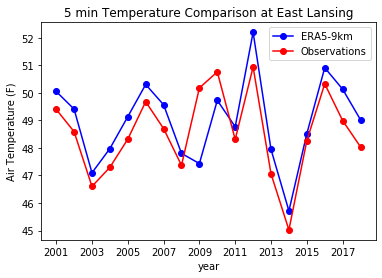

In [16]:
plt.plot(list(range(2001,2019)), era_temp_year, 'b-o')
plt.plot(list(range(2001,2019)), obs_temp_year, 'r-o')
plt.xticks([2001,2003,2005,2007,2009,2011,2013,2015,2017])
plt.xlabel('year')
plt.ylabel('Air Temperature (F)')
plt.legend(['ERA5-9km', 'Observations'])
plt.title('5 min Temperature Comparison at East Lansing')
# plt.savefig('./plot/ERA5-9km-temp.png')
plt.savefig('./plot/ERA5-9km-temp_5min.png')

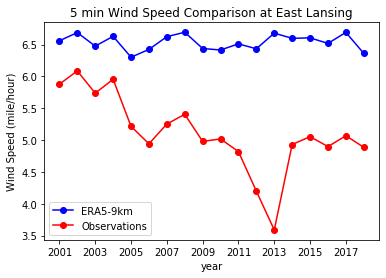

In [17]:
plt.plot(list(range(2001,2019)), era_wind_year, 'b-o')
plt.plot(list(range(2001,2019)), obs_wind_year, 'r-o')
plt.xticks([2001,2003,2005,2007,2009,2011,2013,2015,2017])
plt.xlabel('year')
plt.ylabel('Wind Speed (mile/hour)')
plt.legend(['ERA5-9km', 'Observations'])
plt.title('5 min Wind Speed Comparison at East Lansing')
# plt.savefig('./plot/ERA5-9km-wind.png')
plt.savefig('./plot/ERA5-9km-wind_5min.png')

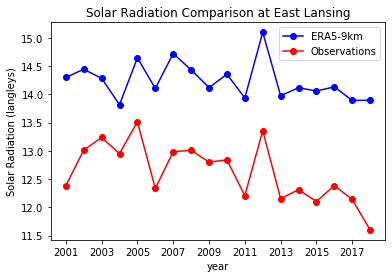

In [55]:
plt.plot(list(range(2001,2019)), era_solar_year, 'b-o')
plt.plot(list(range(2001,2019)), obs_solar_year, 'r-o')
plt.xticks([2001,2003,2005,2007,2009,2011,2013,2015,2017])
plt.xlabel('year')
plt.ylabel('Solar Radiation (langleys)')
plt.legend(['ERA5-9km', 'Observations'])
plt.title('Solar Radiation Comparison at East Lansing')
plt.savefig('./plot/ERA5-9km-solar.png')

In [20]:
plt.plot(list(range(2001,2019)), era_prcp_year, 'b-o')
plt.plot(list(range(2001,2019)), obs_prcp_year, 'r-o')
plt.xticks([2001,2003,2005,2007,2009,2011,2013,2015,2017])
plt.xlabel('year')
plt.ylabel('Precipitation (inches) ')
plt.legend(['ERA5-9km', 'Observations'])
plt.title('total Precipitation Comparison at East Lansing')
# plt.savefig('./plot/ERA5-9km-prcp.png')
# plt.savefig('./plot/ERA5-9km-prcp_5min.png')

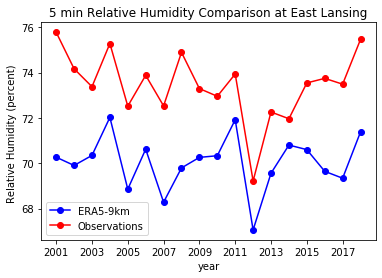

In [21]:
plt.plot(list(range(2001,2019)), era_rh_year, 'b-o')
plt.plot(list(range(2001,2019)), obs_rh_year, 'r-o')
plt.xticks([2001,2003,2005,2007,2009,2011,2013,2015,2017])
plt.xlabel('year')
plt.ylabel('Relative Humidity (percent) ')
plt.legend(['ERA5-9km', 'Observations'])
plt.title('5 min Relative Humidity Comparison at East Lansing')
plt.savefig('./plot/ERA5-9km-rh_5min.png')

In [22]:
df = pd.read_csv('./extracted/East_lansing/temp_2001-2018_30km.csv')
Temp = convert_temperature(df.Temp, 'Kelvin', 'Fahrenheit')
temp = convert_temperature(df.Temp, 'Kelvin', 'Celsius')
df = pd.read_csv('./extracted/East_lansing/prcp_2001-2018_30km.csv')
prcp = df.Prcp * 39.3701
df = pd.read_csv('./extracted/East_lansing/dew_2001-2018_30km.csv')
dew = convert_temperature(df.Dewpoint, 'Kelvin', 'Celsius')
df = pd.read_csv('./extracted/East_lansing/U_2001-2018_30km.csv')
u = df.U * 2.23694
df = pd.read_csv('./extracted/East_lansing/V_2001-2018_30km.csv')
v = df.V * 2.23694  
df = pd.read_csv('./extracted/East_lansing/solar_2001-2018_30km.csv')
solar = df.Solar / 41840.0 

In [23]:
rh = np.array([calc.relative_humidity_from_dewpoint(units.Quantity(temp, 'celsius'), units.Quantity(dew, 'celsius'))])[0,:]
wind = np.sqrt(u**2 + v**2)

In [24]:
eastern = pytz.timezone('US/Eastern')
dff = pd.date_range(start='1/1/2001', end='1/1/2019', freq='H')[:-1].tz_localize(pytz.utc).tz_convert(eastern)
year = dff.strftime('%Y')
mon = dff.strftime('%-m')
day = dff.strftime('%-d')
hour = dff.strftime('%-H')

In [62]:
out = pd.DataFrame({'YEAR':year, 'MONTH':mon, 'DAY':day, 'HOUR':hour, 'atmp':Temp, 'pcpn':prcp, 'relh':rh*100, 'srad':solar, 'wspd':wind})
# out.to_csv('./extracted/East_Lansing_30km.csv')

In [25]:
out = pd.DataFrame({'YEAR':year, 'MONTH':mon, 'DAY':day, 'HOUR':hour, 'atmp':Temp, 'pcpn':prcp, 'relh':rh*100, 'srad':solar, 'wspd':wind})
out = out.drop(out.index[0:6])
out

,YEAR,MONTH,DAY,HOUR,atmp,pcpn,relh,srad,wspd
6,2001,1,1,1,10.185673,0.000019,84.288795,0.000000,4.870395
7,2001,1,1,2,9.042820,0.000000,84.885489,0.000000,5.111853
8,2001,1,1,3,7.669227,0.000000,84.871324,0.000000,5.153842
9,2001,1,1,4,6.591853,0.000000,85.273245,0.000000,4.860731
10,2001,1,1,5,8.296052,0.000000,87.021416,0.000000,4.306955
...,...,...,...,...,...,...,...,...,...
157771,2018,12,31,14,36.849272,0.096381,91.463756,1.734608,9.233703
157772,2018,12,31,15,37.480986,0.126756,93.241211,1.439388,9.799266
157773,2018,12,31,16,37.468516,0.139184,95.454883,0.910134,8.496033
157774,2018,12,31,17,38.050929,0.104641,95.023354,0.289101,7.773046


In [64]:
era_temp_year = pd.unique(out.groupby(out.YEAR)['atmp'].transform('mean'))
obs_temp_year = pd.unique(df1.groupby(df1.YEAR)['atmp'].transform('mean'))
era_prcp_year = pd.unique(out.groupby(out.YEAR)['pcpn'].transform('mean'))
obs_prcp_year = pd.unique(df1.groupby(df1.YEAR)['pcpn'].transform('mean'))
era_wind_year = pd.unique(out.groupby(out.YEAR)['wspd'].transform('mean'))
obs_wind_year = pd.unique(df1.groupby(df1.YEAR)['wspd'].transform('mean'))
era_solar_year = pd.unique(out.groupby(out.YEAR)['srad'].transform('mean'))
obs_solar_year = pd.unique(df1.groupby(df1.YEAR)['srad'].transform('mean'))
era_rh_year = pd.unique(out.groupby(out.YEAR)['relh'].transform('mean'))
obs_rh_year = pd.unique(df1.groupby(df1.YEAR)['relh'].transform('mean'))

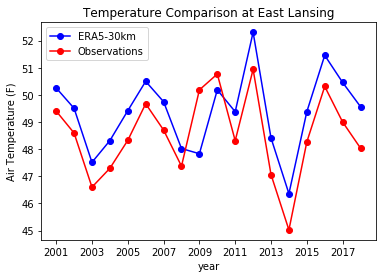

In [12]:
plt.plot(list(range(2001,2019)), era_temp_year, 'b-o')
plt.plot(list(range(2001,2019)), obs_temp_year, 'r-o')
plt.xticks([2001,2003,2005,2007,2009,2011,2013,2015,2017])
plt.xlabel('year')
plt.ylabel('Air Temperature (F)')
plt.legend(['ERA5-30km', 'Observations'])
plt.title('Temperature Comparison at East Lansing')
plt.savefig('./plot/ERA5-30km-temp.png')

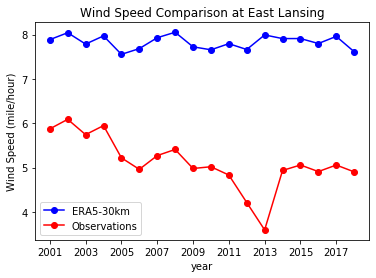

In [13]:
plt.plot(list(range(2001,2019)), era_wind_year, 'b-o')
plt.plot(list(range(2001,2019)), obs_wind_year, 'r-o')
plt.xticks([2001,2003,2005,2007,2009,2011,2013,2015,2017])
plt.xlabel('year')
plt.ylabel('Wind Speed (mile/hour)')
plt.legend(['ERA5-30km', 'Observations'])
plt.title('Wind Speed Comparison at East Lansing')
plt.savefig('./plot/ERA5-30km-wind.png')

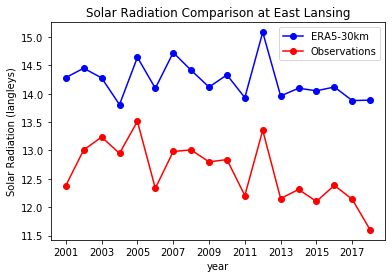

In [14]:
plt.plot(list(range(2001,2019)), era_solar_year, 'b-o')
plt.plot(list(range(2001,2019)), obs_solar_year, 'r-o')
plt.xticks([2001,2003,2005,2007,2009,2011,2013,2015,2017])
plt.xlabel('year')
plt.ylabel('Solar Radiation (langleys)')
plt.legend(['ERA5-30km', 'Observations'])
plt.title('Solar Radiation Comparison at East Lansing')
plt.savefig('./plot/ERA5-30km-solar.png')

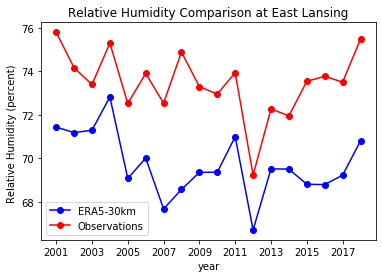

In [15]:
plt.plot(list(range(2001,2019)), era_rh_year, 'b-o')
plt.plot(list(range(2001,2019)), obs_rh_year, 'r-o')
plt.xticks([2001,2003,2005,2007,2009,2011,2013,2015,2017])
plt.xlabel('year')
plt.ylabel('Relative Humidity (percent) ')
plt.legend(['ERA5-30km', 'Observations'])
plt.title('Relative Humidity Comparison at East Lansing')
plt.savefig('./plot/ERA5-30km-rh.png')

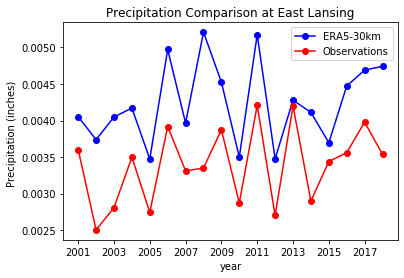

In [65]:
plt.plot(list(range(2001,2019)), era_prcp_year, 'b-o')
plt.plot(list(range(2001,2019)), obs_prcp_year, 'r-o')
plt.xticks([2001,2003,2005,2007,2009,2011,2013,2015,2017])
plt.xlabel('year')
plt.ylabel('Precipitation (inches) ')
plt.legend(['ERA5-30km', 'Observations'])
plt.title('Precipitation Comparison at East Lansing')
plt.savefig('./plot/ERA5-30km-prcp.png')